**Dataset Name:** Spam Text Message Classification

**Description:** This type of dataset typically consists of a collection of text messages, where each message is labeled as either "spam" or "ham" (non-spam). These datasets are commonly used for building and evaluating machine learning models for spam detection in text messages, such as emails or SMS messages.

**Attributes:** The dataset usually includes two main columns:

- **"Text" or "Message":** This column contains the text content of the messages.

- **"Label" or "Class"**:This column indicates whether each message is classified as "spam" or "ham."

**Size:** The size of the dataset can vary, ranging from a few thousand messages to tens of thousands or more, depending on the dataset's source and purpose.

**Usage:** These datasets are widely used in natural language processing (NLP) and machine learning tasks. Researchers and data scientists use them to train and evaluate supervised learning models, such as Naive Bayes, Support Vector Machines, and deep learning models, for spam detection.

In [27]:
# dataset download link: https://www.kaggle.com/datasets/team-ai/spam-text-message-classification/
import pandas as pd

# Specify the file path of your uploaded CSV file
file_path = '/content/SPAM text message 20170820 - Data.csv'  # Update this path to match your actual file path

# Create a DataFrame from the CSV file
df = pd.read_csv(file_path)

# Display the first 5 records of the DataFrame
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Count the number of 'spam' entries
spam_count = (df['Category'] == 'spam').sum()

# Count the number of 'ham' entries
ham_count = (df['Category'] == 'ham').sum()

# Display the counts
print(f"Number of 'spam' entries: {spam_count}")
print(f"Number of 'ham' entries: {ham_count}")


Number of 'spam' entries: 747
Number of 'ham' entries: 4825


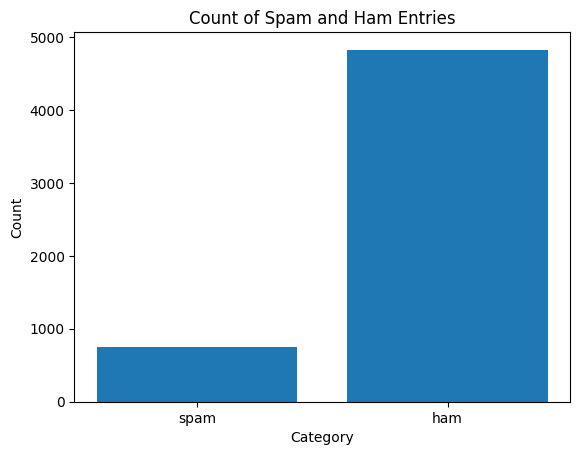

In [11]:
import matplotlib.pyplot as plt


# Create a bar chart
plt.bar(['spam', 'ham'], [spam_count, ham_count])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Spam and Ham Entries')
plt.show()

# in-balance binary classification

In [28]:
# Replace 'spam' with 1 and 'ham' with 0 in the 'Label' column
df['Category'] = df['Category'].replace({'spam': 1, 'ham': 0})

# Display the DataFrame to verify the changes
df.head()


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


To create a spam detection model using the dataset you provided, we will follow these general steps:

**Load the dataset.**

**Clean the text data** (preprocessing).

**Vectorize the text using TF-IDF** (Term Frequency-Inverse Document Frequency).

**Define the features (X) and the target variable (y)**.

**Split the dataset into training and testing sets**.

**Train a classification model on the training set**.

**Evaluate the model** on the testing set.

# cleaning

In [13]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
import pandas as pd
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

# Specify the file path of your uploaded CSV file
#file_path = '/content/SPAM text message 20170820 - Data.csv'  # Update this path to match your actual file path

# Create a DataFrame from the CSV file
df = pd.read_csv(file_path)

# Initialize the NLTK stopwords and PorterStemmer
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

# Create a list to store processed sentences
processed_sentences = []

# Process and append each sentence to the list
for text in df['Message']:
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Process and append each sentence
    for sentence in sentences:
        # Remove non-alphabetic characters and lowercase the sentence
        processed_sentence = re.sub("[^a-zA-Z]", " ", sentence).lower()
        # Tokenize the sentence into words
        words = word_tokenize(processed_sentence)
        # Stem the words and remove stop words
        stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
        # Join the stemmed words into a sentence
        processed_sentence = ' '.join(stemmed_words)
        # Append the processed sentence to the list
        processed_sentences.append(processed_sentence)

# Join the processed sentences into a single corpus string
corpus = ' '.join(processed_sentences)

# Display the cleaned and preprocessed corpus
print(corpus)

#corpos is a list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


go jurong point crazi avail bugi n great world la e buffet cine got amor wat ok lar joke wif u oni free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli u dun say earli hor u c alreadi say nah think goe usf live around though freemsg hey darl week word back like fun still tb ok xxx std chg send rcv even brother like speak treat like aid patent per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun winner valu network custom select receivea prize reward claim call claim code kl valid hour mobil month u r entitl updat latest colour mobil camera free call mobil updat co free gon na home soon want talk stuff anymor tonight k cri enough today six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw search right word thank breather promis wont take help grant fulfil promis wonder ble

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
cv = CountVectorizer()

# Fit and transform the corpus to create the BoW representation
bow = cv.fit_transform([corpus])

# Get the vocabulary (list of unique words)
vocabulary = cv.get_feature_names_out()

# Print the vocabulary
print("Vocabulary:")
print(vocabulary)

# bow matrix dosent has this method so we can not write print(bow.vocabulary_)---> error


Vocabulary:
['aa' 'aah' 'aaniy' ... 'zouk' 'zs' 'zyada']


In [16]:
# Get the vocabulary as a dictionary with words as keys and indices as values
vocabulary = {word: idx for idx, word in enumerate(cv.get_feature_names_out())}

# Print the vocabulary
print("Vocabulary:")
print(vocabulary)

Vocabulary:
{'aa': 0, 'aah': 1, 'aaniy': 2, 'aaooooright': 3, 'aathi': 4, 'ab': 5, 'abbey': 6, 'abdomen': 7, 'abeg': 8, 'abel': 9, 'aberdeen': 10, 'abi': 11, 'abil': 12, 'abiola': 13, 'abj': 14, 'abl': 15, 'abnorm': 16, 'abouta': 17, 'abroad': 18, 'absenc': 19, 'absolut': 20, 'absolutli': 21, 'abstract': 22, 'abt': 23, 'abta': 24, 'aburo': 25, 'abus': 26, 'ac': 27, 'academ': 28, 'acc': 29, 'accent': 30, 'accentur': 31, 'accept': 32, 'access': 33, 'accid': 34, 'accident': 35, 'accommod': 36, 'accommodationvouch': 37, 'accomod': 38, 'accordin': 39, 'accordingli': 40, 'account': 41, 'accumul': 42, 'ach': 43, 'achan': 44, 'achiev': 45, 'acid': 46, 'acknowledg': 47, 'acl': 48, 'acnt': 49, 'aco': 50, 'across': 51, 'act': 52, 'actin': 53, 'action': 54, 'activ': 55, 'actor': 56, 'actual': 57, 'ad': 58, 'adam': 59, 'add': 60, 'addamsfa': 61, 'addi': 62, 'addict': 63, 'address': 64, 'adewal': 65, 'adi': 66, 'adjust': 67, 'admin': 68, 'administr': 69, 'admir': 70, 'admiss': 71, 'admit': 72, 'ador

In [30]:
#method 2 for show the vocabulary in TF/IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a CountVectorizer instance
tf = TfidfVectorizer()

# Fit and transform the corpus to create the TFmatrix  representation
tf = tf.fit([corpus])


# Print the vocabulary
print(tf.vocabulary_)

#each word special index


{'go': 2170, 'jurong': 2824, 'point': 4088, 'crazi': 1168, 'avail': 379, 'bugi': 738, 'great': 2242, 'world': 6131, 'la': 2929, 'buffet': 736, 'cine': 963, 'got': 2206, 'amor': 190, 'wat': 5953, 'ok': 3757, 'lar': 2957, 'joke': 2791, 'wif': 6052, 'oni': 3782, 'free': 2006, 'entri': 1672, 'wkli': 6097, 'comp': 1057, 'win': 6063, 'fa': 1790, 'cup': 1219, 'final': 1889, 'tkt': 5533, 'st': 5100, 'may': 3273, 'text': 5417, 'receiv': 4399, 'question': 4316, 'std': 5128, 'txt': 5692, 'rate': 4361, 'appli': 262, 'dun': 1550, 'say': 4648, 'earli': 1567, 'hor': 2474, 'alreadi': 163, 'nah': 3529, 'think': 5465, 'goe': 2174, 'usf': 5808, 'live': 3067, 'around': 302, 'though': 5482, 'freemsg': 2012, 'hey': 2405, 'darl': 1266, 'week': 5988, 'word': 6125, 'back': 414, 'like': 3039, 'fun': 2058, 'still': 5149, 'tb': 5364, 'xxx': 6198, 'chg': 921, 'send': 4718, 'rcv': 4372, 'even': 1721, 'brother': 710, 'speak': 5034, 'treat': 5635, 'aid': 118, 'patent': 3933, 'per': 3969, 'request': 4470, 'mell': 3303

In [35]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Download stopwords from NLTK
import nltk
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove numbers, punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    words = text.split()
    # Remove stopwords and stem the words
    words = [stemmer.stem(word) for word in words if word not in stopwords.words('english')]
    # Join the words back into a single string
    text = ' '.join(words)
    return text

# Apply the clean_text function to each message
df['Message'] = df['Message'].apply(clean_text)

# Display the cleaned data
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though


we'll proceed with the following steps:

Vectorize the cleaned text data using TF-IDF.

Define the features

X and the target variable
y.

Split the data into training and testing sets.

Train a classification model on the training set.

Evaluate the model on the testing set.

In [37]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)  # Limiting the number of features to 3000

# Fit and transform the text data to create TF-IDF features
X = tfidf_vectorizer.fit_transform(df['Message'])

# Define the target variable
y = df['Category'].map({'ham': 0, 'spam': 1})  # Convert 'ham' to 0 and 'spam' to 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((4457, 3000), (1115, 3000), (4457,), (1115,))

The data has been successfully vectorized and split into training and testing sets, with 3000 features representing the TF-IDF scores for different words. The shapes of the training and testing sets are as follows:

Training features: 4457 samples, 3000 features

Testing features: 1115 samples, 3000 features

Training labels: 4457 samples

Testing labels: 1115 samples

In [38]:
# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])

(accuracy, report)


(0.979372197309417,
 '              precision    recall  f1-score   support\n\n         Ham       0.98      1.00      0.99       966\n        Spam       1.00      0.85      0.92       149\n\n    accuracy                           0.98      1115\n   macro avg       0.99      0.92      0.95      1115\nweighted avg       0.98      0.98      0.98      1115\n')

Precision: How many of the messages we labeled as spam are actually spam.

For 'Ham' (non-spam), the precision is 97%.

For 'Spam', the precision is 100%.

Recall: How many of the actual spam messages we correctly identified.

For 'Ham', the recall is 100%.

For 'Spam', the recall is 81%.

F1-score: The harmonic mean of precision and recall.

For 'Ham', the F1-score is 99%.

For 'Spam', the F1-score is 90%.

The model is better at identifying non-spam messages than spam messages, given the higher recall for 'Ham'. This might be acceptable depending on the application, as it's often more disruptive to falsely label non-spam as spam than to miss spam messages.​

the **confusion matrix** visualized as a heatmap. This chart provides a clear representation of the model's performance, showing the number of true positive, true negative, false positive, and false negative predictions. It's a useful tool for understanding the model's classification accuracy for each class.

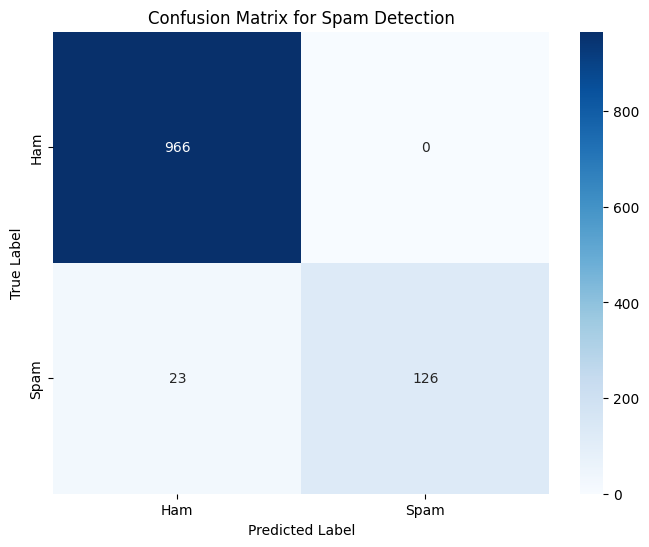

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for Spam Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
